In [2]:
import os
import polars as pl
import seaborn as sns

In [3]:
os.chdir("/Users/samuel/Documents/GitHub/QB-GPT")

In [4]:
time_rmse = pl.read_parquet("models/modeling/QBGPT/evaluations/v2/rmse/time_rmse_eval.parquet")
playtype_rmse = pl.read_parquet("models/modeling/QBGPT/evaluations/v2/rmse/playtype_rmse_eval.parquet")
positions_rmse = pl.read_parquet("models/modeling/QBGPT/evaluations/v2/rmse/positions_rmse_eval.parquet")

time_acc = pl.read_parquet("models/modeling/QBGPT/evaluations/v2/acc/time_acc_eval.parquet")
playtype_acc = pl.read_parquet("models/modeling/QBGPT/evaluations/v2/acc/playtype_acc_eval.parquet")
positions_acc = pl.read_parquet("models/modeling/QBGPT/evaluations/v2/acc/positions_acc_eval.parquet")

In [5]:
import pandas as pd

tiny = pd.read_csv("models/modeling/QBGPT/history/training_history_model_tinyv2.csv", sep =";").reset_index(names="Epoch")
tiny.insert(0, "Model", "tiny")

small = pd.read_csv("models/modeling/QBGPT/history/training_history_model_smallv2.csv", sep =";").reset_index(names="Epoch")
small.insert(0, "Model", "small")

medium = pd.read_csv("models/modeling/QBGPT/history/training_history_model_mediumv2.csv", sep =";").reset_index(names="Epoch")
medium.insert(0, "Model", "medium")

large = pd.read_csv("models/modeling/QBGPT/history/training_history_model_largev2.csv", sep =";").reset_index(names="Epoch")
large.insert(0, "Model", "large")

In [6]:
def generate_plot(var, df_list):
    plot = pd.concat([d[["Model", "Epoch", var]] for d in df_list])
    return plot

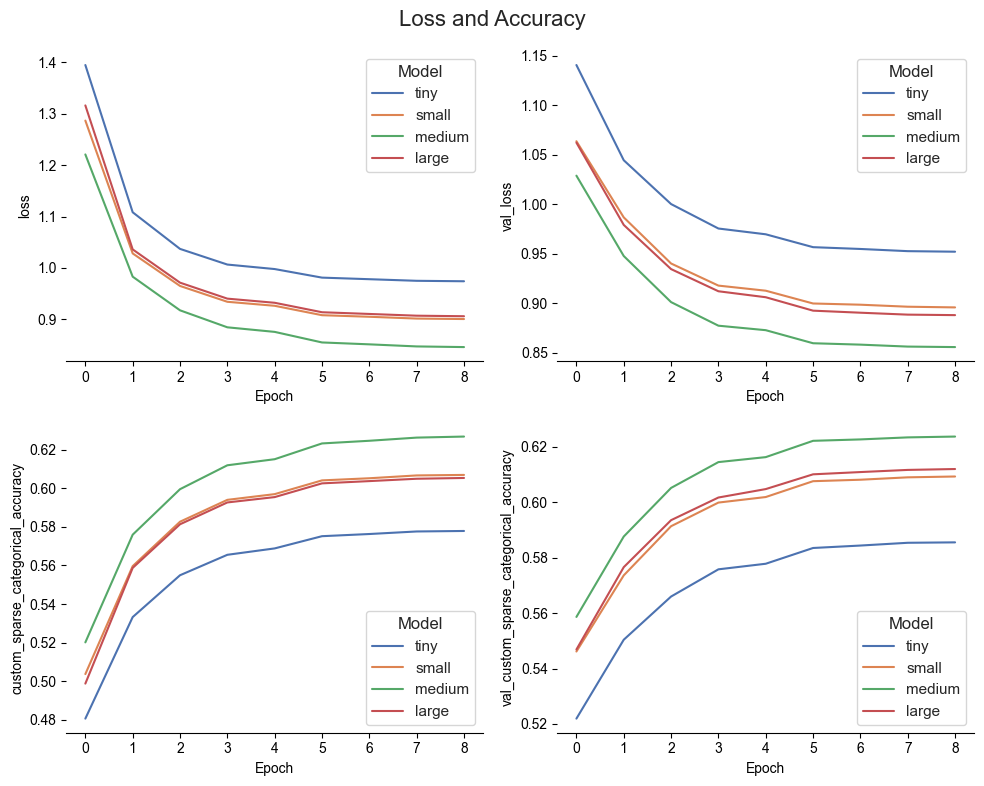

In [7]:
import matplotlib.pyplot as plt
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # You can adjust the figsize as needed

# Assign each subplot to a specific location in the grid
sns.set(style="whitegrid")
sns.despine(left=True)

sns.lineplot(data=generate_plot("loss", [tiny, small, medium, large]), x="Epoch", y = "loss", hue = "Model", ax=axes[0, 0])  # Plot 1 on the top-left
sns.lineplot(data= generate_plot("val_loss", [tiny, small, medium, large]), x="Epoch", y = "val_loss", hue = "Model", ax=axes[0, 1])      # Plot 2 on the top-right
sns.lineplot(data=generate_plot("custom_sparse_categorical_accuracy", [tiny, small, medium, large]), x="Epoch", y = "custom_sparse_categorical_accuracy", hue = "Model", ax=axes[1, 0])     # Plot 3 on the bottom-left
sns.lineplot(data=generate_plot("val_custom_sparse_categorical_accuracy", [tiny, small, medium, large]), x="Epoch", y = "val_custom_sparse_categorical_accuracy", hue = "Model", ax=axes[1, 1])     # Plot 4 on the bottom-right

# Set a common title for all plots if needed
fig.suptitle("Loss and Accuracy", fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()

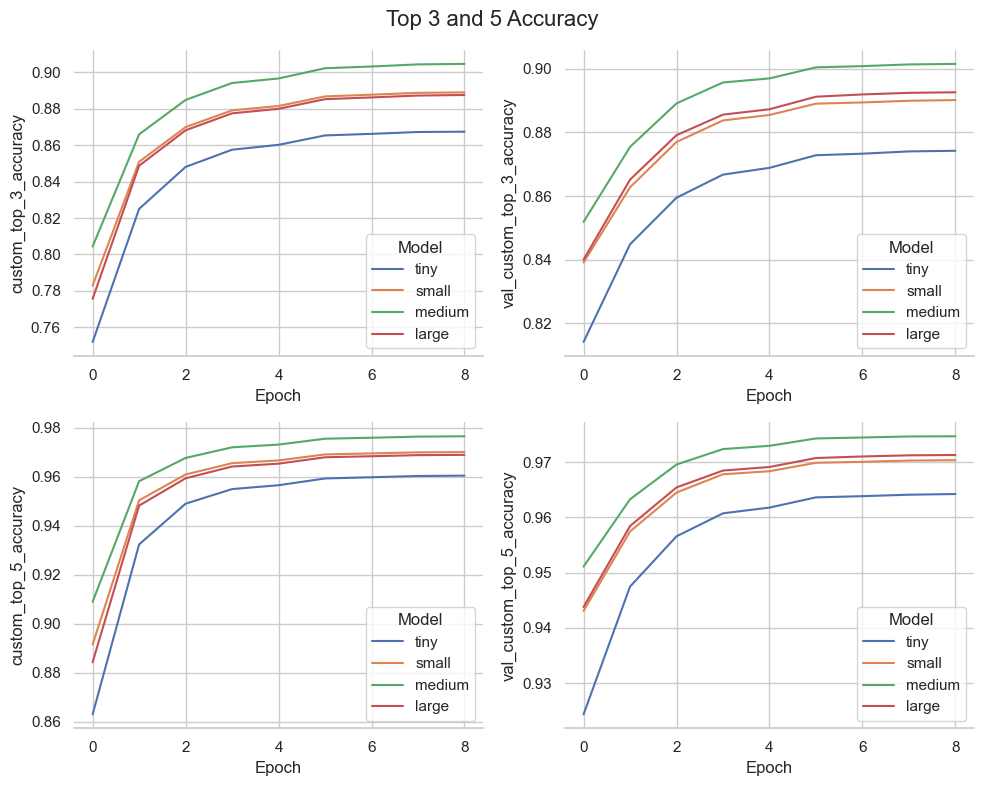

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # You can adjust the figsize as needed

# Assign each subplot to a specific location in the grid
sns.set(style="whitegrid")
sns.despine(left=True)

sns.lineplot(data=generate_plot("custom_top_3_accuracy", [tiny, small, medium, large]), x="Epoch", y = "custom_top_3_accuracy", hue = "Model", ax=axes[0, 0])  # Plot 1 on the top-left
sns.lineplot(data= generate_plot("val_custom_top_3_accuracy", [tiny, small, medium, large]), x="Epoch", y = "val_custom_top_3_accuracy", hue = "Model", ax=axes[0, 1])      # Plot 2 on the top-right
sns.lineplot(data=generate_plot("custom_top_5_accuracy", [tiny, small, medium, large]), x="Epoch", y = "custom_top_5_accuracy", hue = "Model", ax=axes[1, 0])     # Plot 3 on the bottom-left
sns.lineplot(data=generate_plot("val_custom_top_5_accuracy", [tiny, small, medium, large]), x="Epoch", y = "val_custom_top_5_accuracy", hue = "Model", ax=axes[1, 1])     # Plot 4 on the bottom-right

# Set a common title for all plots if needed
fig.suptitle("Top 3 and 5 Accuracy", fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()

In [9]:
plays_index = pl.read_parquet("indexv2/plays_index.parquet")
positions_index = pl.read_parquet("indexv2/positions_index.parquet")

In [10]:
to_plot_time_rmse = (time_rmse.
                melt(id_vars="time", value_name="RMSE", variable_name="Model").
                filter(pl.col("time") < 50)).to_pandas()

to_plot_playtype_rmse = (playtype_rmse.
                    melt(id_vars="playtype", value_name="RMSE", variable_name="Model").
                    rename({"playtype" : "PlayType_ID"}).
                join(plays_index,
                     on = "PlayType_ID",
                     how = "left").
                filter(pl.col("PlayType") != "no_play").
                drop("PlayType_ID")).to_pandas()

to_plot_positions_rmse = (positions_rmse.
                     melt(id_vars="positions", value_name="RMSE", variable_name="Model").
                     rename({"positions" : "position_ID"}).
                    join(positions_index,
                        on = "position_ID",
                        how = "left").
                    drop("position_ID", "Cat")).to_pandas()

to_plot_time_acc = (time_acc.
                melt(id_vars="time", value_name="Acc", variable_name="Model").
                filter(pl.col("time") < 50)).to_pandas()

to_plot_playtype_acc = (playtype_acc.
                    melt(id_vars="playtype", value_name="Acc", variable_name="Model").
                    rename({"playtype" : "PlayType_ID"}).
                        join(plays_index,
                        on = "PlayType_ID",
                         how = "left").
                        filter(pl.col("PlayType") != "no_play").
                    drop("PlayType_ID")).to_pandas()

to_plot_positions_acc = (positions_acc.
                     melt(id_vars="positions", value_name="Acc", variable_name="Model").
                     rename({"positions" : "position_ID"}).
                    join(positions_index,
                        on = "position_ID",
                        how = "left").
                    drop("position_ID", "Cat")).to_pandas()

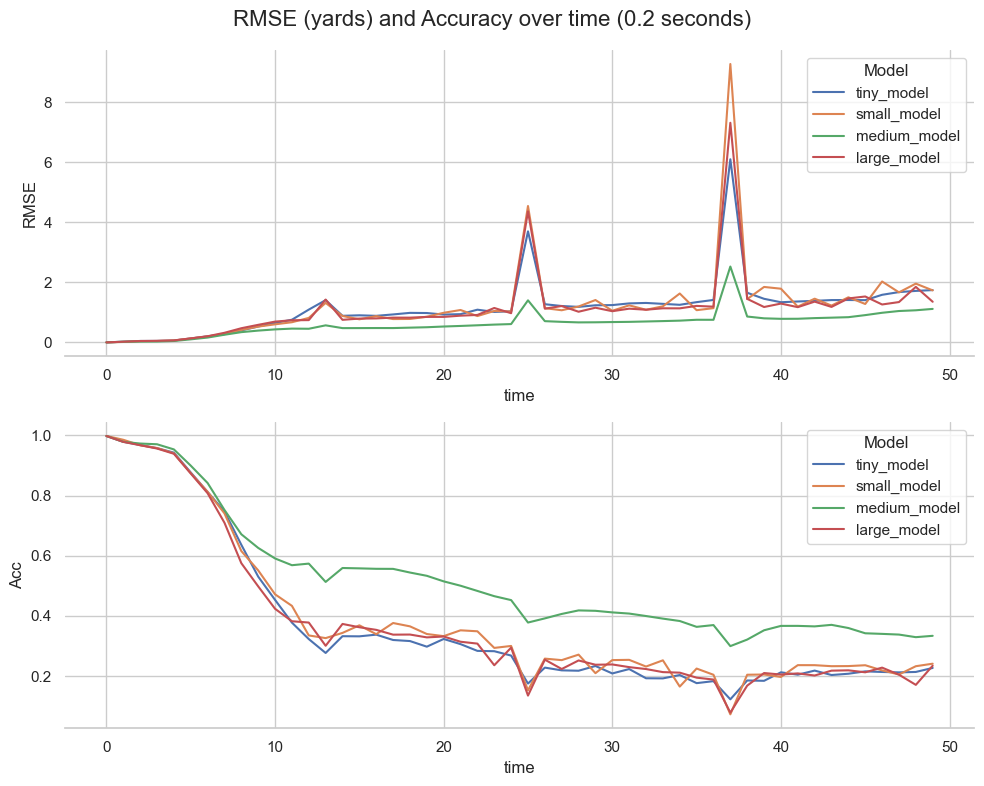

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # You can adjust the figsize as needed

# Assign each subplot to a specific location in the grid
sns.set(style="whitegrid")
sns.despine(left=True)

sns.lineplot(data = to_plot_time_rmse, x = "time", y="RMSE", hue="Model", ax=axes[0])  # Plot 1 on the top-left
sns.lineplot(data = to_plot_time_acc, x = "time", y="Acc", hue="Model", ax=axes[1])      # Plot 2 on the top-right

# Set a common title for all plots if needed
fig.suptitle("RMSE (yards) and Accuracy over time (0.2 seconds)", fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()

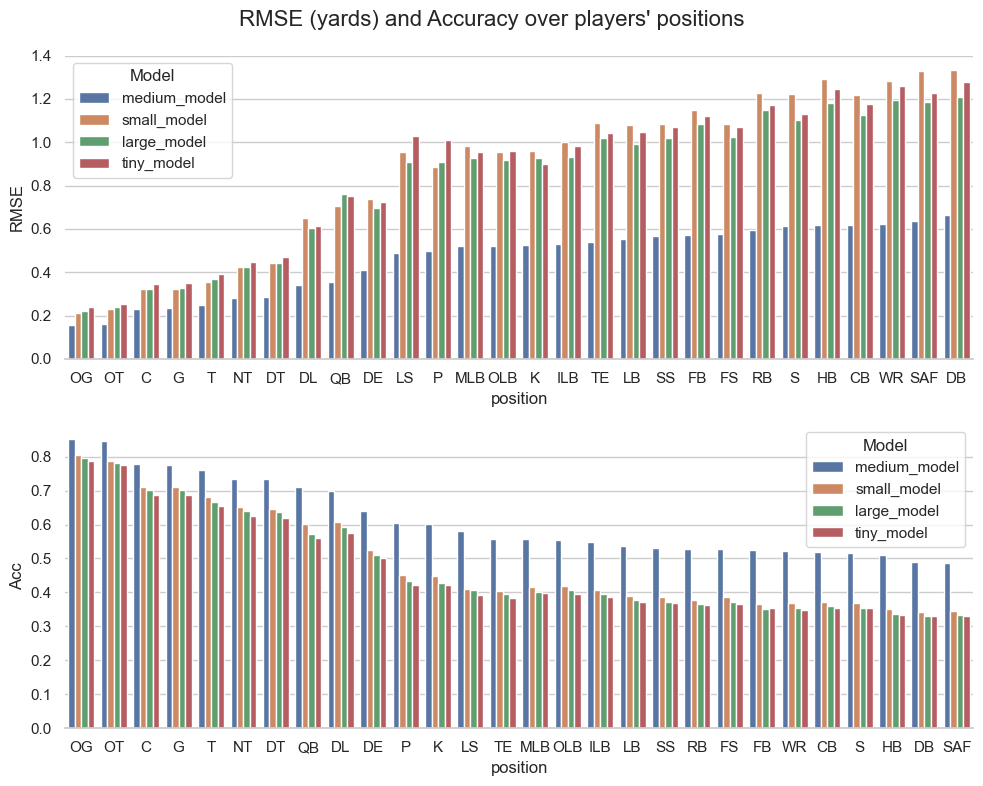

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # You can adjust the figsize as needed

# Assign each subplot to a specific location in the grid
sns.set(style="whitegrid")
sns.despine(left=True)

sns.barplot(data = to_plot_positions_rmse.sort_values("RMSE"), x = "position", y="RMSE", hue="Model", ax=axes[0])  # Plot 1 on the top-left
sns.barplot(data = to_plot_positions_acc.sort_values("Acc", ascending=False), x = "position", y="Acc", hue="Model", ax=axes[1])      # Plot 2 on the top-right

# Set a common title for all plots if needed
fig.suptitle("RMSE (yards) and Accuracy over players' positions", fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()

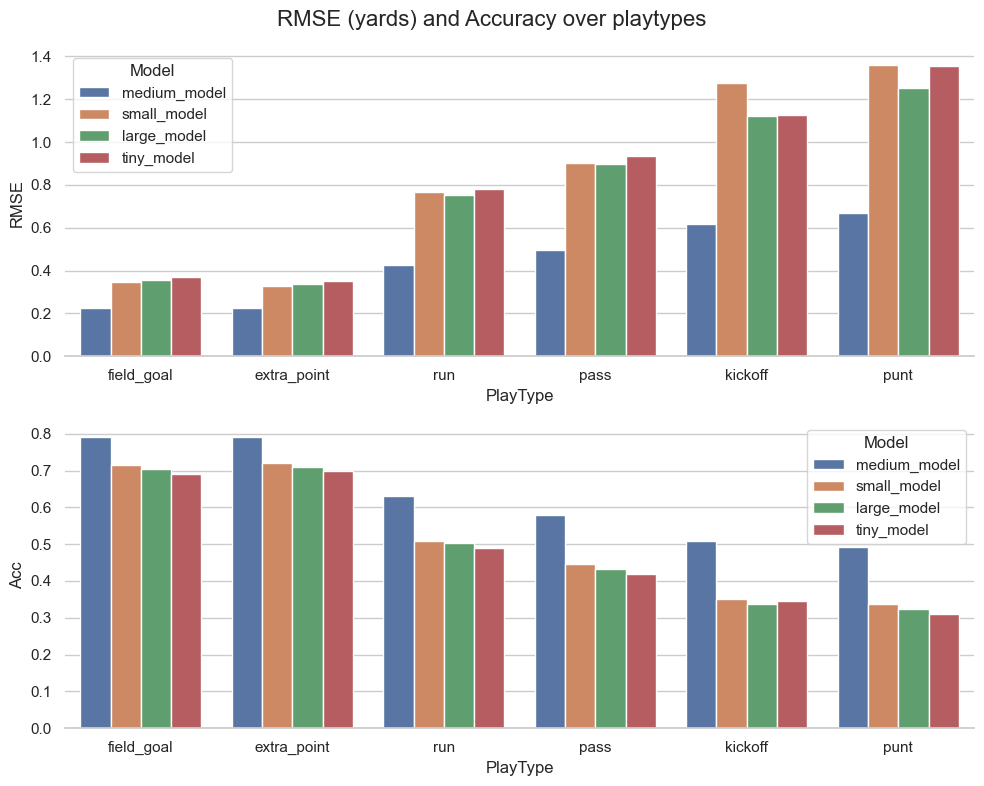

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # You can adjust the figsize as needed

# Assign each subplot to a specific location in the grid
sns.set(style="whitegrid")
sns.despine(left=True)

sns.barplot(data = to_plot_playtype_rmse.sort_values("RMSE"), x = "PlayType", y="RMSE", hue="Model", ax=axes[0])  # Plot 1 on the top-left
sns.barplot(data = to_plot_playtype_acc.sort_values("Acc", ascending=False), x = "PlayType", y="Acc", hue="Model", ax=axes[1])      # Plot 2 on the top-right

# Set a common title for all plots if needed
fig.suptitle("RMSE (yards) and Accuracy over playtypes", fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()